# Retrieving the Dataset

In [1]:
# claiming the dataset
import pandas as pd

cxr_dataset = pd.read_csv("features.csv")
cxr_dataset.head()

,Unnamed: 0,mean0,variance0,skewness0,uniformity0,snr0,mean1,variance1,skewness1,uniformity1,...,variance14,skewness14,uniformity14,snr14,mean15,variance15,skewness15,uniformity15,snr15,label
0,0,70.153934,1897.820090,0.155578,154,1.610366,67.820031,1431.488738,0.101886,149,...,0.0,0.0,0,0.0,0.000000,0.000000,0.000000,0,0.000000,COVID-19
1,1,67.943420,1640.924326,0.179606,158,1.677271,62.438356,1516.524282,0.382945,153,...,0.0,0.0,0,0.0,125.818182,59.954257,0.105233,38,16.249253,COVID-19
2,2,85.324244,1666.530997,-0.291033,153,2.090094,61.805752,1425.903805,0.326995,145,...,0.0,0.0,0,0.0,0.000000,0.000000,0.000000,0,0.000000,COVID-19
3,3,84.536424,1134.304302,-0.575772,129,2.510031,85.243692,957.789884,-0.289562,136,...,0.0,0.0,0,0.0,105.758879,247.749337,-0.316222,64,6.719092,COVID-19
4,4,97.321200,1344.070831,-0.521123,164,2.654583,102.034224,1417.579232,-0.313052,155,...,0.0,0.0,0,0.0,121.310059,518.784337,-0.373516,95,5.326027,COVID-19


# Splitting the dataset to train and test

In [2]:
# Getting the features needed

#get the feature columns
col_features = list(cxr_dataset.columns)
#get the label column
label = list(cxr_dataset.columns).pop()
#deleting label column from col
del col_features[0]
del col_features[len(col_features) - 1]

features = cxr_dataset.loc[:, col_features].values
labels = cxr_dataset.loc[:, label].values

display(pd.DataFrame(features))

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,70.153934,1897.820090,0.155578,154.0,1.610366,67.820031,1431.488738,0.101886,149.0,1.792520,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,67.943420,1640.924326,0.179606,158.0,1.677271,62.438356,1516.524282,0.382945,153.0,1.603344,...,0.000000,0.000000,0.000000,0.0,0.000000,125.818182,59.954257,0.105233,38.0,16.249253
2,85.324244,1666.530997,-0.291033,153.0,2.090094,61.805752,1425.903805,0.326995,145.0,1.636755,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,84.536424,1134.304302,-0.575772,129.0,2.510031,85.243692,957.789884,-0.289562,136.0,2.754401,...,0.000000,0.000000,0.000000,0.0,0.000000,105.758879,247.749337,-0.316222,64.0,6.719092
4,97.321200,1344.070831,-0.521123,164.0,2.654583,102.034224,1417.579232,-0.313052,155.0,2.710018,...,0.000000,0.000000,0.000000,0.0,0.000000,121.310059,518.784337,-0.373516,95.0,5.326027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,67.485362,590.801404,0.125502,101.0,2.776443,58.764064,1009.093014,-0.076914,125.0,1.849891,...,108.375000,24.734375,0.136133,7.0,21.791074,46.903541,1214.512063,0.503447,120.0,1.345875
296,57.642643,1138.936360,0.439436,135.0,1.708025,55.429969,1205.076900,0.298250,133.0,1.596751,...,0.000000,0.000000,0.000000,0.0,0.000000,109.913580,392.893766,-2.253583,36.0,5.545156
297,52.461857,967.863802,0.288745,120.0,1.686307,58.074462,876.051465,0.146898,131.0,1.962097,...,113.789474,8.060942,-0.710812,7.0,40.078291,96.602423,387.369465,0.734007,104.0,4.908235
298,85.349291,861.184734,-0.512971,114.0,2.908384,57.942963,1208.748901,0.157751,123.0,1.666605,...,0.000000,0.000000,0.000000,0.0,0.000000,79.568421,959.213740,-0.612756,85.0,2.569112


In [3]:
from sklearn.model_selection import train_test_split

# Separating test and train dataset
train_features, test_features, train_lbl, test_lbl = train_test_split( features, labels, test_size=0.2, random_state=0)

In [4]:
#Standardizing the Dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fitting of training dataset only
scaler.fit(train_features)

# Apply transform to both the training set and the test set.
train_features = scaler.transform(train_features)
test_features = scaler.transform(test_features)

# Applying Principal Component Analysis

In [5]:
# Feeding it to Principal Component Analysis
from sklearn.decomposition import PCA

# 5 different variance
variances = ["100%", "99%", "95%", "90%", "85%"]
pca = [PCA(), PCA(.99), PCA(.95), PCA(.90), PCA(.85)]
# results of each PCA variance
pca_fit = []

for p in pca:
    pca_content = {"fit": None, "transforms": {"train": None, "test": None}}
    pca_content["fit"] = p.fit(train_features)
    pca_content["transforms"]["train"] = p.transform(train_features)
    pca_content["transforms"]["test"] = p.transform(test_features)
    pca_fit.append(pca_content)

In [6]:
# checking the number of Principal Component
print("From 80 features")
for i in range(len(variances)):
    print(f"Principal Components with {variances[i]} variance:", pca_fit[i]["fit"].n_components_)

From 80 features
Principal Components with 100% variance: 80
Principal Components with 99% variance: 58
Principal Components with 95% variance: 39
Principal Components with 90% variance: 29
Principal Components with 85% variance: 23


# Applying Linear Discriminant Analysis

### Libraries Needed

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score

import numpy as np

lda = LinearDiscriminantAnalysis()

### With Principal Component Analysis

In [11]:
# Evaluating of Model
for i in range(len(pca_fit)):
    # define model evaluation method
    cv = StratifiedKFold(n_splits=20, random_state=1, shuffle=True)
    # evaluate model
    scores = cross_val_score(lda, pca_fit[i]["transforms"]["train"], np.ravel(train_lbl), scoring='accuracy', cv=cv)
    # summarize result
    print('Accuracies:', scores)
    print('Variance of %s:\nMean Accuracy: %.4f (%.4f)\n' % (variances[i], np.mean(scores), np.std(scores)))
    print('------------------------------------------------')

Accuracies: [0.75       0.5        0.58333333 0.5        0.58333333 0.66666667
 0.58333333 0.33333333 0.5        0.66666667 0.58333333 0.75
 0.58333333 0.66666667 0.75       0.58333333 0.41666667 0.83333333
 0.58333333 0.66666667]
Variance of 100%:
Mean Accuracy: 0.6042 (0.1175)

------------------------------------------------
Accuracies: [0.66666667 0.5        0.5        0.5        0.75       0.58333333
 0.5        0.25       0.41666667 0.75       0.58333333 0.58333333
 0.5        0.58333333 0.75       0.75       0.41666667 0.83333333
 0.66666667 0.58333333]
Variance of 99%:
Mean Accuracy: 0.5833 (0.1394)

------------------------------------------------
Accuracies: [0.58333333 0.5        0.58333333 0.41666667 0.75       0.58333333
 0.5        0.58333333 0.5        0.58333333 0.5        0.66666667
 0.58333333 0.83333333 0.91666667 0.66666667 0.5        0.75
 0.75       0.58333333]
Variance of 95%:
Mean Accuracy: 0.6167 (0.1247)

------------------------------------------------
Accura

In [30]:
#Train the model
results = [] # where all the results will place

for i in range(len(pca_fit)):
    lda.fit(pca_fit[i]["transforms"]["train"], np.ravel(train_lbl))
    predictions = lda.predict(pca_fit[i]["transforms"]["test"])
    results.append(predictions)

In [31]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

for i in range(len(pca_fit)):
    print("Variance of", variances[i])
    print("Accuracy Score -", accuracy_score(test_lbl, results[i]))
    
    print("Confusion Matrix")
    print(confusion_matrix(test_lbl, results[i]))
    
    print("Classification Report")
    print(classification_report(test_lbl, results[i]))
    
    print()

Variance of 100%
Accuracy Score - 0.6166666666666667
Confusion Matrix
[[14  4  2]
 [ 2 15  3]
 [ 7  5  8]]
Classification Report
              precision    recall  f1-score   support

    COVID-19       0.61      0.70      0.65        20
  No Finding       0.62      0.75      0.68        20
   Pneumonia       0.62      0.40      0.48        20

    accuracy                           0.62        60
   macro avg       0.62      0.62      0.61        60
weighted avg       0.62      0.62      0.61        60


Variance of 99%
Accuracy Score - 0.6166666666666667
Confusion Matrix
[[14  2  4]
 [ 1 15  4]
 [ 8  4  8]]
Classification Report
              precision    recall  f1-score   support

    COVID-19       0.61      0.70      0.65        20
  No Finding       0.71      0.75      0.73        20
   Pneumonia       0.50      0.40      0.44        20

    accuracy                           0.62        60
   macro avg       0.61      0.62      0.61        60
weighted avg       0.61      0.62  

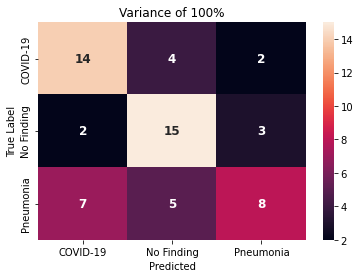

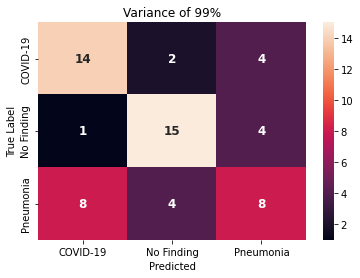

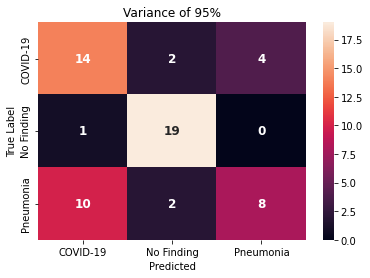

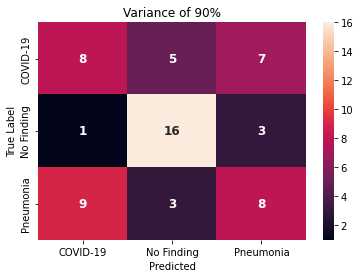

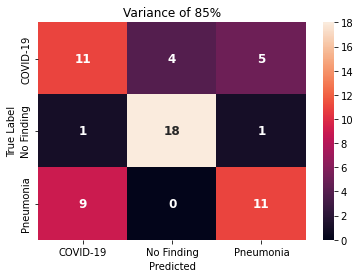

In [128]:
#Display Confusion Matrix
#Credits: https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns


for conf_idx in range(len(results)):
    conf_matrix = confusion_matrix(test_lbl, results[conf_idx])
    df_cm = pd.DataFrame(
        conf_matrix, index=['COVID-19', 'No Finding', 'Pneumonia'], columns=['COVID-19', 'No Finding', 'Pneumonia'], 
    )
    
    heatmap = sns.heatmap(df_cm, annot=True, fmt='d', annot_kws={"fontsize": 12, "fontweight": 'bold'})
    
    plt.title(f"Variance of {variances[conf_idx]}")
    plt.ylabel("True Label")
    plt.xlabel("Predicted")
    plt.show()

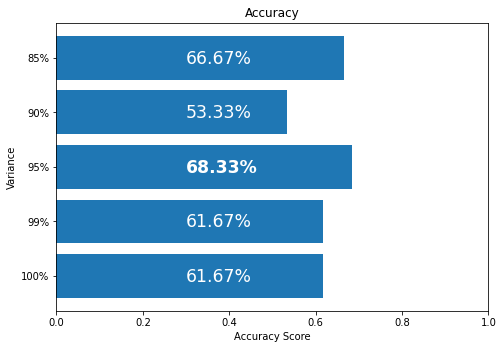

In [84]:
# For Accuracy, Precision, 
accuracies = []
threshold = -0.1

fig = plt.figure()
ax = fig.add_axes([0,1,1,1])

for i in range(len(results)):
    accuracies.append(accuracy_score(test_lbl, results[i]))
    if(i != 2):
        ax.text(0.3, threshold, str(round(accuracies[i]*100, 2)) + '%', color='white', fontsize="xx-large")
    else:
        ax.text(0.3, threshold, str(round(accuracies[i]*100, 2)) + '%', color='white', fontweight="bold", fontsize="xx-large")
    threshold = threshold + 1
    
ax.barh(variances, accuracies)
ax.set(xlim=[0, 1])
ax.set_ylabel('Variance')
ax.set_xlabel('Accuracy Score')
plt.title("Accuracy")
plt.show()

In [115]:
from sklearn.metrics import precision_score, recall_score, f1_score

def getBarH(results, title="Precision", score_method='precision'):
    classes = ['COVID-19', 'Pneumonia', 'No Finding']
    variances = ["100%", "99%", "95%", "90%", "85%"]
    
    for i in range(len(variances)):
        #Set up the figure
        fig = plt.figure()
        ax = fig.add_axes([0,1,1,1])
        
        if(score_method == 'precision'):
            score = precision_score(test_lbl, results[i], average=None)
        elif (score_method == 'recall'):
            score = recall_score(test_lbl, results[i], average=None)
        else:
            score = f1_score(test_lbl, results[i], average=None)

        ax.text(0.2, -0.05, str(round(precisions[0]*100, 2)) + '%', color='white', fontsize="xx-large")
        ax.text(0.2, 0.95, str(round(precisions[1]*100, 2)) + '%', color='white', fontsize="xx-large")
        ax.text(0.2, 1.95, str(round(precisions[2]*100, 2)) + '%', color='white', fontsize="xx-large")

        ax.barh(classes, precisions)
        ax.set(xlim=[0, 1])
        ax.set_ylabel('Classes')
        ax.set_xlabel(f'{title} Score')
        plt.title(f"{title} from Variance {variances[i]}")
        plt.show()

In [50]:
# saving model as a pickle
import pickle

pickle.dump(lda_train, open("lda-model.sav", "wb"))
pickle.dump(scaler ,open("scaler.sav", "wb"))

In [127]:
import collections, numpy
print(collections.Counter(results[0]))
print(collections.Counter(test_lbl))

Counter({'No Finding': 24, 'COVID-19': 23, 'Pneumonia': 13})
Counter({'No Finding': 20, 'Pneumonia': 20, 'COVID-19': 20})
